In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeRegressor as CART
from sklearn.preprocessing import StandardScaler

### Load the dataset from the file Ecommerce.csv

```
This dataset includes the following data for 200 online customers:

- Email
- Adress
- Avatar
- Avg Session Length (everage time they spent on usage)
- Time on App (time they spent using the application)
- Time on Website (time they spent using the website)
- Length of Membership (for how long they have been a user)
- Yearly Amount Spent (how much money they spend yearly)

Yout goal will be to estimate the value of the Yearly Amount Spent using the feature(s) of the users
```

In [2]:
df = pd.read_csv('Ecommerce.csv')
df.head()

,Email,Address,Avatar,Avg Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank TunnelWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer CommonDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582Cobbborough, DC ...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David ThroughwayPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez PassagePort Jacobville, PR 372...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


### Get rid of non-numerical columns of the dataset

In [3]:
df = df.select_dtypes(include=[np.number])
df.head()

,Avg Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,34.497268,12.655651,39.577668,4.082621,587.951054
1,31.926272,11.109461,37.268959,2.664034,392.204933
2,33.000915,11.330278,37.110597,4.104543,487.547505
3,34.305557,13.717514,36.721283,3.120179,581.852344
4,33.330673,12.795189,37.536653,4.446308,599.406092


### Use Yearly Amount Spent as your target variable. Plot the relationship of each of the numerical features with the target variable

Text(81.125, 0.5, 'Yearly Amount Spent')

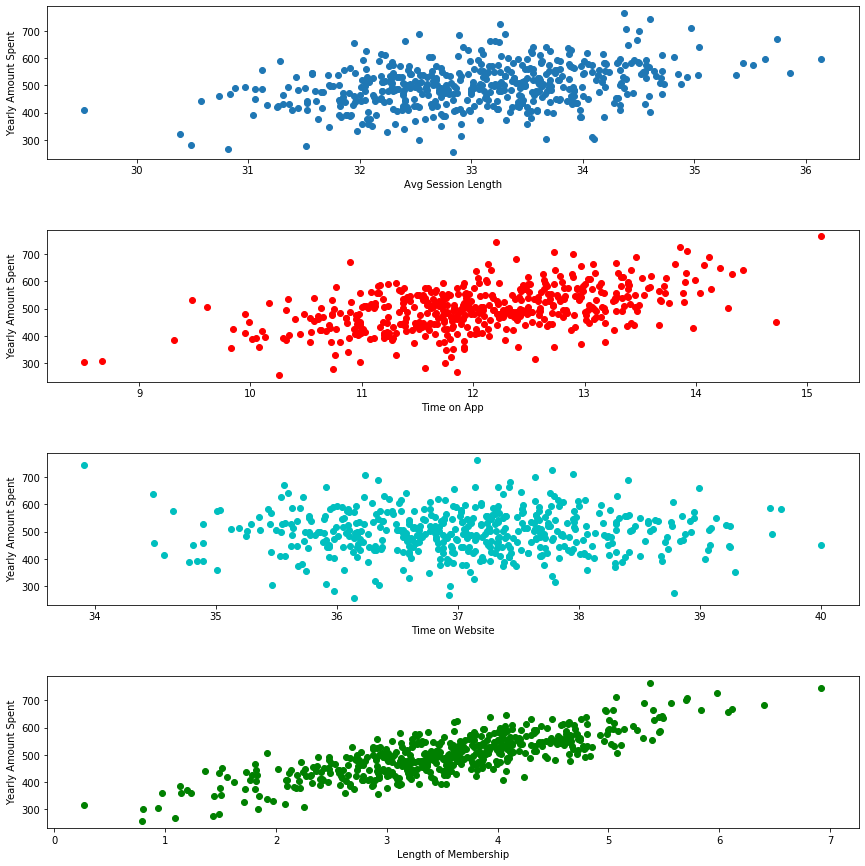

In [4]:
fig, axis = plt.subplots(4,1,figsize=[12,12])
#fig.set_figwidth(8)
#fig.set_figheight(10)
fig.tight_layout(h_pad=5)

axis[0].scatter(df[df.columns[0]],df[df.columns[-1]])
axis[0].set_xlabel(df.columns[0])
axis[0].set_ylabel(df.columns[-1])

axis[1].scatter(df[df.columns[1]],df[df.columns[-1]],color='r')
axis[1].set_xlabel(df.columns[1])
axis[1].set_ylabel(df.columns[-1])

axis[2].scatter(df[df.columns[2]],df[df.columns[-1]],color='c')
axis[2].set_xlabel(df.columns[2])
axis[2].set_ylabel(df.columns[-1])

axis[3].scatter(df[df.columns[3]],df[df.columns[-1]],color='g')
axis[3].set_xlabel(df.columns[3])
axis[3].set_ylabel(df.columns[-1])

### Leave only one feature that has a linear relationship with the target variable.

In [5]:
df1 = pd.DataFrame(df['Length of Membership'])
target = df['Yearly Amount Spent']
df1

,Length of Membership
0,4.082621
1,2.664034
2,4.104543
3,3.120179
4,4.446308
...,...
495,3.746573
496,3.576526
497,4.958264
498,2.336485


### Divide the dataset into training and test sets with the ratio 80:20.

In [6]:
from sklearn.model_selection import train_test_split as tts
xTrain,xTest,yTrain,yTest= tts(df1,target,test_size=0.2,random_state = 40)


### Use the resulting train and test sets with the next 2 functions to fit linear regression and plot the resulting regression line.

The first function is `fit_1d_linear_regression` that takes two vectors $x$ and $y$, and returns a numpy array ($\beta_0, \beta_1)$, where $\beta_0$ is the intercept of the line, and $\beta_1$ is the slope. 

In [7]:
def fit_1d_linear_regression(data_vector1, response_vector):
    data_vector1.loc[:,'for_intercept'] = 1
    data_vector = data_vector1.loc[:,['for_intercept','Length of Membership']]
    a = np.dot(np.dot(np.linalg.inv(np.dot(data_vector.T,data_vector)),data_vector.T),response_vector)
    #a = np.dot(data_vector.T,data_vector)#X.T*X
    #a = np.linalg.inv(a)#inverse of X.T*X
    #a = np.dot(a,data_vector.T)
    #a = np.dot(a,response_vector)
    
    """
    :param data_vector: A pandas series object (i.e. a column of a dataframe),
                        where each element is a data point (x)
    :param response_vector: A pandas series object (i.e. a column of a dataframe),
                        where each element is label (y)
    :return: numpy array beta of coefficients of the regression
    
    Note: You can avoid the intercept for simplicity 
    or include the intercept for an extra point
    """
    
    #TODO
    
    return a
beta = fit_1d_linear_regression(xTrain, yTrain)
beta

C:\Users\-Intel-\Anaconda3\lib\site-packages\pandas\core\indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\-Intel-\Anaconda3\lib\site-packages\pandas\core\indexing.py:576: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value


array([268.48747823,  65.35341456])

The second function is `plot_line` function, that takes $\beta_0, \beta_1, x, y$ and plots a scatter plot of the data, and the line $y = \beta_0 + \beta_1 x$. And saves the plot in `YOURNAME.png`

C:\Users\-Intel-\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


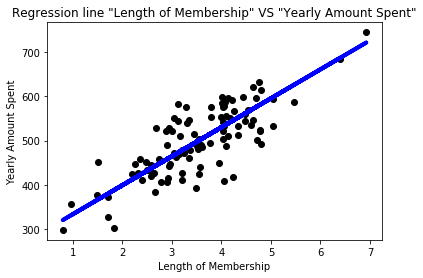

In [8]:
def plot_fitted_line(b0,b1,x,y,username: str):
    a = plt.scatter(x,y,color='k')
    b = plt.plot(x,b1 * xTest +b0,color='b',lw=4)
    plt.title('Regression line "Length of Membership" VS "Yearly Amount Spent"')
    plt.xlabel("Length of Membership")
    plt.ylabel("Yearly Amount Spent")
    plt.savefig('%s.png' % username,dpi = 130,facecolor='c',)
    """
    :param b0: Intersept of line to plot
    Note: avoid this if you don't have an intercept in the previous function
    :param b1: Slope of the line to plot
    :param x: A pandas series object (i.e. a column of a dataframe),
                        where each element is a data point (x coordinates)
    :param y: A pandas series object (i.e. a column of a dataframe),
                        where each element is a label (y coordinates)
    """
    return 
plot_fitted_line(fit_1d_linear_regression(xTrain,yTrain)[0],fit_1d_linear_regression(xTrain,yTrain)[1],xTest,yTest,'Edgar')


### Plot example

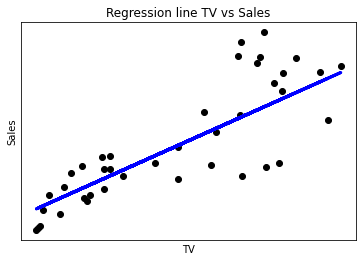

### Now fit the linear regression to the data containing only 1 feature using sklearn and compare the results with your own fit_1d_linear_regression function

In [9]:
df1 = pd.DataFrame(df['Length of Membership'])
target = df['Yearly Amount Spent']
from sklearn.model_selection import train_test_split as tts
xTrain,xTest,yTrain,yTest= tts(df1,target,test_size=0.2,random_state = 40)
from sklearn.linear_model import LinearRegression
regr = LinearRegression(fit_intercept=True)
regr.fit(xTrain,yTrain)
pred = regr.predict(xTest)
print(regr.coef_,regr.intercept_)
print(beta)

[65.35341456] 268.48747822690325
[268.48747823  65.35341456]


In [10]:
model= CART()
model.fit(xTrain,yTrain)
pred_cart = model.predict(xTest)

In [11]:
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
print(mean_absolute_error(yTest,pred_cart).round(1))
print(mean_squared_error(yTest,pred_cart).round(1))
print(np.sqrt(mean_squared_error(yTest,pred_cart)).round(1))
print(r2_score(yTest,pred_cart).round(1))


56.7
4873.8
69.8
0.2


### Use sklearn.metrics to calculate Mean absolute error, Mean squared error, Root mean squared error and R-squared for the results of your own function vs the sklearn regression results. Try to interprete your results.

In [12]:
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
print(mean_absolute_error(yTest,pred).round(1))
print(mean_squared_error(yTest,pred).round(1))
print(np.sqrt(mean_squared_error(yTest,pred)).round(1))
print(r2_score(yTest,pred).round(1))


37.7
2303.0
48.0
0.6


### Fit linear regression to the data containing all numerical features using sklearn and use the same metrics to evaluate how good the model is.

In [13]:
df = pd.read_csv('Ecommerce.csv')
df = df.drop(['Email','Address','Avatar',],axis=1)
df.head()
from sklearn.model_selection import train_test_split as tts
xTrain,xTest,yTrain,yTest= tts(df[df.columns.difference(['Yearly Amount Spent'])],df['Yearly Amount Spent'],test_size=0.2,random_state = 40)
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(xTrain,yTrain)
pred = regr.predict(xTest)
print(mean_absolute_error(yTest,pred).round(1))
print(mean_squared_error(yTest,pred).round(1))
print(np.sqrt(mean_squared_error(yTest,pred)).round(1))
print(r2_score(yTest,pred).round(1))


8.6
111.1
10.5
1.0
